Today we're going to utilize a very simple (but rich) data set housed in the UCI Machine Learning repository. The Adult Income Dataset is taken from US Census information and is formatted particularly well to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than $50,000. 

The data includes age, workclass, a weight variable (to account for the unbalanced sampling), education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individuals residency, and a target column that indicates whether the person attained a household income greater than $50,000. All in all, an interested data set for socio-economic research. So let's get our hands dirty and load up some data!

In [1]:
import sklearn.naive_bayes as nb
import pandas as pd
import numpy as np
import matplotlib as plt

# Load the data 

Load the adult data set, which is just a .data (read: .txt) file. There are no column labels. Read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/Adult, and use the in-built Pandas dataframe options to attach the column labels into the data frame. 

In [43]:
adult_dat = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*', engine='python', na_values="?")

df = adult_dat

In [55]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

# Convert the categorical variables into unordered integral values

For us to use the scikit-learn (although not every implementation of) Naive Bayes, we must pass in numerical data. Since we have decided to analyze all unordered categorical values, we can do a one-hot encoding to convert our categorical data into a numerical data frame.

**Note**: Do not use scikit-learn's implementation of One-hot encoding, we want to get you familiar with a bunch of methods, but as you should know by now, there are many ways to do the same thing. If you want, to a challenge, you can write the procedure both from scikit-learn and Pandas method. 

In [56]:
for col in ["Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country", 'Target']:
    df[col] = df[col].astype('category')

In [57]:
cat_columns = df.select_dtypes(['category']).columns

In [58]:
cat_columns

Index([u'Workclass', u'Education', u'Martial Status', u'Occupation',
       u'Relationship', u'Race', u'Sex', u'Country', u'Target'],
      dtype='object')

In [59]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [98]:
df.Sex.unique()

array([1, 0])

In [61]:
# I think i got it 2:30

# Challenge Problem: Alternative Encoding Scheme to One-Hot Encoding

Likewise, beside doing a One-hot encoding, we could also map each string label in our categorical features to a integral value. As we previously leveraged a Pandas data frame method to do the encoding, we are now going to test out a scikit-learn method to impose the integral value encoding. Please check the docs and read up on: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. Proceed with the encoding and build a Naive Bayes and Logistic classifier for both. Do we get similar results? What should we expect? And why?

In [96]:
#Naive Bayes

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['Target'])
X = df.drop('Target', axis=1)

In [64]:
df_standardized = StandardScaler().fit_transform(X)
df_standardized[0:5]

array([[ 0.03067056,  2.15057856, -1.06361075, -0.33543693,  1.13473876,
         0.92163395, -1.3178091 , -0.27780504,  0.39366753,  0.70307135,
         0.1484529 , -0.21665953, -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , -0.33543693,  1.13473876,
        -0.4062122 , -0.60838662, -0.90018084,  0.39366753,  0.70307135,
        -0.14592048, -0.21665953, -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 ,  0.18133163, -0.42005962,
        -1.73405835, -0.1354383 , -0.27780504,  0.39366753,  0.70307135,
        -0.14592048, -0.21665953, -0.03542945,  0.29156857],
       [ 1.05704673,  0.09005041,  0.42580136, -2.40251115, -1.19745882,
        -0.4062122 , -0.1354383 , -0.90018084, -1.96262077,  0.70307135,
        -0.14592048, -0.21665953, -0.03542945,  0.29156857],
       [-0.77576787,  0.09005041,  1.40817572, -0.33543693,  1.13473876,
        -0.4062122 ,  0.81045833,  2.21169816, -1.96262077, -1.42233076,
        -0.14592048, -0.21

# Summarize the data and engage in elementary data exploration

In [65]:
y.shape

(32561,)

In [66]:
X.shape

(32561, 14)

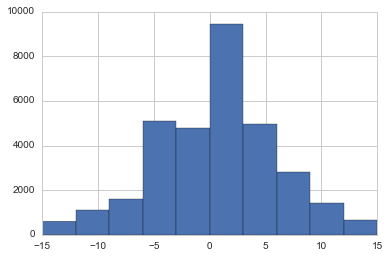

In [71]:
plt.figure();
df['Education'].diff().hist()

For some data exploration, use Pandas histogram methods to display the features. 

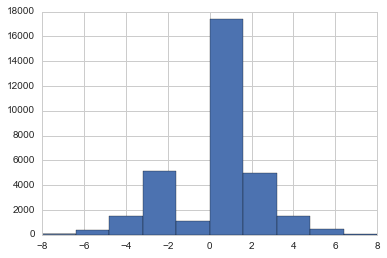

In [72]:
plt.figure();
df['Workclass'].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

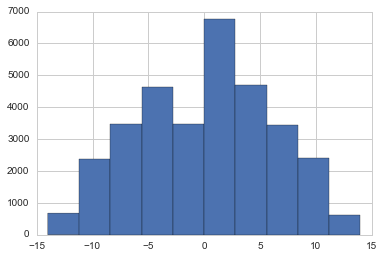

In [75]:
plt.figure();
df["Occupation"].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

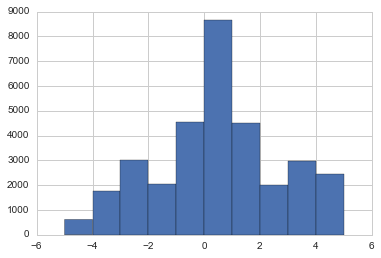

In [76]:
plt.figure();
df["Relationship"].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

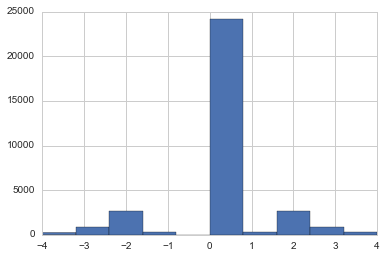

In [77]:
plt.figure();
df["Race"].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

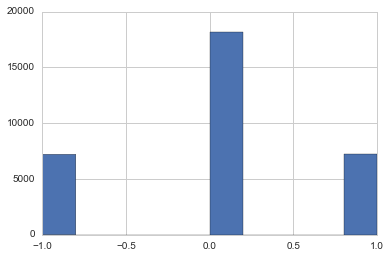

In [78]:
plt.figure();
df["Sex"].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

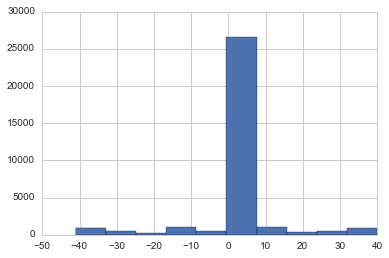

In [79]:
plt.figure();
df["Country"].diff().hist()
# "Workclass", "Education", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Country",

# Partition the data

In [85]:
import numpy as np
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(22792, 14)
(9769, 14)
(22792,)
(9769,)


# Define your feature set and define your target 

In [86]:
X.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4


In [88]:
y

array([0, 0, 0, ..., 0, 0, 1])

# Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. 

In [141]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the ALL data
NBC_all = GaussianNB()
NBC_all.fit(X, y)
NBC_all.score(X, y)

0.79503086514541932

In [142]:
y_hat_all = NBC_all.predict(X)

In [143]:
print classification_report(y, y_hat_all)

             precision    recall  f1-score   support

          0       0.81      0.95      0.88     24720
          1       0.66      0.31      0.42      7841

avg / total       0.78      0.80      0.77     32561



### Now for the TTS

In [144]:
NBC = GaussianNB()
NBC.fit(x_train, y_train)
NBC.score(x_train, y_train)

0.79650754650754652

In [145]:
y_hat = NBC.predict(x_train)

In [146]:
print classification_report(y_train, y_hat)

             precision    recall  f1-score   support

          0       0.81      0.95      0.88     17367
          1       0.65      0.31      0.42      5425

avg / total       0.78      0.80      0.77     22792



In [147]:
# from sklearn.naive_bayes import MultinomialNB
# mnb_train = MultinomialNB()
# mnb_train.fit(x_train, y_train)
# mnb_train.score(x_train, y_train)

In [148]:
from sklearn.naive_bayes import BernoulliNB

bnb_train = BernoulliNB()
bnb_train.fit(x_train, y_train)
bnb_train.score(x_train, y_train)

0.73534573534573533

In [149]:
y_hat = NBC.predict(x_test)

In [150]:
print classification_report(y_test, y_hat)

             precision    recall  f1-score   support

          0       0.81      0.95      0.87      7353
          1       0.68      0.32      0.43      2416

avg / total       0.78      0.79      0.77      9769



# Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

Score the Naive Bayes classifier on the test data

In [152]:
bnb_train.score(x_test, y_test)

0.72996212508956904

# Check Accuracy / Score for a Random Forest Classifier 

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc = RandomForestClassifier(max_depth = 8)

In [222]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [223]:
rfc.score(x_train, y_train)

0.86214461214461213

In [224]:
rfc.score(x_test, y_test)

0.84942163988125707

# Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

In [153]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(x_train, y_train)
lm.score(x_train, y_train)

0.80291330291330287

In [154]:
lm.score(x_test, y_test)

0.79731804688299723

Produce the accuracy score of the logistic regression from the test set

In [140]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, lm.predict(x_test))

array([[7146,  207],
       [1773,  643]])

Was that what you expected? All we did was remove non categorical variables, and imposed a One-hot encoding, should we have expected the Naive Bayes to underperform the Logistic? Here are some other things you can think about:

1. What other metrics outside of simple accuracy can we utilize to measure performance?
2. Could some pair-wise correlation between pair-wise features in our feature set have caused an issue with the Naive Bayes? What are the assumptions for Naive Bayes which may cause this to happen? 
3. How could we improve the performance of Naive Bayes? 
4. What about the numerica features we left out, should we bring them back in? How?

If you want to expand on your analysis, why not build a correlation matrix, or perhaps print a summary of the logistic regression, would an ANOVA table help in our assessment for this case? 